# **Title: Market Traction Segmentation and Intervention Prioritization in True Wireless Earphones**

## **Subtitle: An Unsupervised Learning Analysis Based on Observable Market Signals**

### Data Description

**Dataset name:** Flipkart Earphones

**Dataset link**: https://www.kaggle.com/datasets/peshimaammuzammil/flipkart-earphones

**About this dataset:**
This is a pre-crawled dataset, taken as subset of a bigger data set (more than 5.8 million products) that was created by extracting data from Flipkart.com, a leading Indian eCommerce store.

- **company:** The name of the company that makes the product.

- **name:** The name of the product.

- **color:** The color of the product.

- **type:** The type of product.

- **ratings:** The ratings of the product by users.

- **people_review:** The number of people who have reviewed the product.

- **offer_price:** The offer price of the product.

- **real_price:** The real price of the product.

- **offer:** The offer that is available for the product.

### Problem Statement:
 Given all products currently visible on the platform, which ones exhibit relatively weaker observable market traction signals and may require closer monitoring or intervention?

### Objectives:
The objective of this project is to identify products with weaker observable market traction among Flipkart earphones by analyzing price, ratings, and review volume using clustering and multivariate analysis, in order to support targeted monitoring and intervention strategies.

In [12]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA

In [13]:
# Setting visualization style

sns.set_style("whitegrid")
# This sets the background theme of all subsequent Seaborn plots to a white background with horizontal and vertical grid lines. This style is often used to make data points easier to read against a clean background.

plt.rcParams['figure.figsize']= (12,6)
# This modifies the default figure size for all plots generated in the current session using Matplotlib's runtime configuration (rcParams). The dimensions are set to a width of 12 inches and a height of 6 inches.

In [14]:
# Loading data
df= pd.read_csv(r"C:\Users\ASUS\Desktop\Projects\Market_Traction_Segmentation_and_Intervention_Prioritization_in_True_Wireless_Earphones\earphones.csv")

In [15]:
df.head(2)

,Unnamed: 0,company,name,color,type,ratings,people_review,offer_price,real_price,offer
0,0,Aroma,NB119B Badshah - 40 Hours Playtime Bluetooth N...,Black,In the Ear,4.0,"2,40,115",₹381,"₹1,499",74% off
1,1,TECHFIRE,Fire 500v2 Neckband hi-bass Wireless Bluetooth...,Blue,In the Ear,3.9,"1,88,519",₹445,"₹3,850",88% off


In [16]:
df=df.drop(columns=["Unnamed: 0"])

In [17]:
df

,company,name,color,type,ratings,people_review,offer_price,real_price,offer
0,Aroma,NB119B Badshah - 40 Hours Playtime Bluetooth N...,Black,In the Ear,4.0,"2,40,115",₹381,"₹1,499",74% off
1,TECHFIRE,Fire 500v2 Neckband hi-bass Wireless Bluetooth...,Blue,In the Ear,3.9,"1,88,519",₹445,"₹3,850",88% off
2,Aroma,NB119 Titanium - 48 Hours Playtime Bluetooth N...,Blue,In the Ear,4.0,"1,62,560",₹499,"₹2,499",80% off
3,Boult,"Audio Z40 with Zen ENC Mic, 60H Battery Life, ...",White,In the Ear,4.2,"14,276","₹1,299","₹4,999",74% off
4,Aroma,NB119Pro Belief 48 Hours Playing Time Fast Cha...,Blue,In the Ear,4.0,"65,327",₹395,"₹1,999",80% off
...,...,...,...,...,...,...,...,...,...
943,Boult,"Audio Z40 with Zen ENC Mic, 60H Battery Life, ...",Blue,In the Ear,4.1,"2,992","₹1,499","₹4,000",62% off
944,Intex,MUSIQUE Flexi Bluetooth Headset,Black,In the Ear,3.3,10,"₹1,040","₹2,199",52% off
945,Zaap,AQUA GEAR Bluetooth without Mic Headset,Black,In the Ear,4.0,11,₹699,"₹1,999",65% off
946,Landmark,"PLAY2.0, 50 Hours Playtime, IPX4 Water Resista...",Grey,In the Ear,3.5,515,₹378,"₹1,998",81% off


In [18]:
# Need only True Wireless earphones

df=df[df["type"].str.contains("True Wireless",case=False,na=False)].copy()

In [19]:
df
# focussing on one type (True Wireless) to ensure comparability.

,company,name,color,type,ratings,people_review,offer_price,real_price,offer
9,MASOORI,M19 / M10 / T2 TWS Bluetooth 5.0 Wireless Touc...,Black,True Wireless,3.6,547,₹499,"₹1,299",61% off
10,Dozokil,High M10 Pro TWS Bluetooth Earbuds Wireless Ea...,Black,True Wireless,3.7,365,₹488,"₹2,499",80% off
11,Boult,"Audio AirBass Y1 TWS Earbuds, 40H Playtime, Fa...",Black,True Wireless,4.1,"1,11,172",₹999,"₹5,499",81% off
12,boAt,Airdopes 131 with upto 60 Hours and ASAP Charg...,Active Black Matte Indi,True Wireless,4.0,"13,45,614",₹899,"₹2,990",69% off
14,Noise,"Buds VS102 with 50 Hrs Playtime, 11mm Driver, ...",Jet Black,True Wireless,4.1,"2,52,983","₹1,299","₹2,999",56% off
...,...,...,...,...,...,...,...,...,...
937,FUR,"JADEN AirJams Gamex Pro with ENC HD+ Calling, ...",Black,True Wireless,4.2,"14,276",₹899,"₹5,999",85% off
938,Kabeer,enterprises L21 Earbuds/Air-pod/ buds 5.0 Blue...,Black,True Wireless,3.8,321,₹424,"₹2,699",84% off
939,Boult,"Audio Gearpods with 32H Playtime, Fast Chargin...",White,True Wireless,3.9,38,₹449,₹999,55% off
940,FINGER,THREE Premium TWS I12 Twins touch sensor Bluet...,White,True Wireless,3.7,96,₹799,"₹2,599",69% off


In [20]:
df.shape

(414, 9)

In [21]:
df.columns

Index(['company', 'name', 'color', 'type', 'ratings', 'people_review',
       'offer_price', 'real_price', 'offer'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 9 to 941
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company        414 non-null    object 
 1   name           414 non-null    object 
 2   color          414 non-null    object 
 3   type           414 non-null    object 
 4   ratings        414 non-null    float64
 5   people_review  414 non-null    object 
 6   offer_price    414 non-null    object 
 7   real_price     414 non-null    object 
 8   offer          414 non-null    object 
dtypes: float64(1), object(8)
memory usage: 32.3+ KB


In [23]:
# Cleaning people_review column

df["people_review"]= (
    df["people_review"]
    .astype(str)
    .str.replace(",","")
    .astype(int)
)

In [24]:
# Handling missing values conservatively

df["ratings"]= df["ratings"].fillna(0)    # Product ratings are ordinal in nature; however, as they represent averaged scores across a large number of user reviews, they were treated as continuous numerical variables
df["offer"]= df["offer"].fillna(0)

In [25]:
# Cleaning and converting "offer_price" and "real_price" to numeric

df["offer_price"] = df["offer_price"].str.replace("₹", "").str.replace(",","").astype(float)
df['real_price'] = df['real_price'].str.replace('₹', '').str.replace(',', '', regex=False).astype(float)


In [26]:
df

,company,name,color,type,ratings,people_review,offer_price,real_price,offer
9,MASOORI,M19 / M10 / T2 TWS Bluetooth 5.0 Wireless Touc...,Black,True Wireless,3.6,547,499.0,1299.0,61% off
10,Dozokil,High M10 Pro TWS Bluetooth Earbuds Wireless Ea...,Black,True Wireless,3.7,365,488.0,2499.0,80% off
11,Boult,"Audio AirBass Y1 TWS Earbuds, 40H Playtime, Fa...",Black,True Wireless,4.1,111172,999.0,5499.0,81% off
12,boAt,Airdopes 131 with upto 60 Hours and ASAP Charg...,Active Black Matte Indi,True Wireless,4.0,1345614,899.0,2990.0,69% off
14,Noise,"Buds VS102 with 50 Hrs Playtime, 11mm Driver, ...",Jet Black,True Wireless,4.1,252983,1299.0,2999.0,56% off
...,...,...,...,...,...,...,...,...,...
937,FUR,"JADEN AirJams Gamex Pro with ENC HD+ Calling, ...",Black,True Wireless,4.2,14276,899.0,5999.0,85% off
938,Kabeer,enterprises L21 Earbuds/Air-pod/ buds 5.0 Blue...,Black,True Wireless,3.8,321,424.0,2699.0,84% off
939,Boult,"Audio Gearpods with 32H Playtime, Fast Chargin...",White,True Wireless,3.9,38,449.0,999.0,55% off
940,FINGER,THREE Premium TWS I12 Twins touch sensor Bluet...,White,True Wireless,3.7,96,799.0,2599.0,69% off


In [27]:
df=df.drop(columns=["offer","type"])

In [28]:
df

,company,name,color,ratings,people_review,offer_price,real_price
9,MASOORI,M19 / M10 / T2 TWS Bluetooth 5.0 Wireless Touc...,Black,3.6,547,499.0,1299.0
10,Dozokil,High M10 Pro TWS Bluetooth Earbuds Wireless Ea...,Black,3.7,365,488.0,2499.0
11,Boult,"Audio AirBass Y1 TWS Earbuds, 40H Playtime, Fa...",Black,4.1,111172,999.0,5499.0
12,boAt,Airdopes 131 with upto 60 Hours and ASAP Charg...,Active Black Matte Indi,4.0,1345614,899.0,2990.0
14,Noise,"Buds VS102 with 50 Hrs Playtime, 11mm Driver, ...",Jet Black,4.1,252983,1299.0,2999.0
...,...,...,...,...,...,...,...
937,FUR,"JADEN AirJams Gamex Pro with ENC HD+ Calling, ...",Black,4.2,14276,899.0,5999.0
938,Kabeer,enterprises L21 Earbuds/Air-pod/ buds 5.0 Blue...,Black,3.8,321,424.0,2699.0
939,Boult,"Audio Gearpods with 32H Playtime, Fast Chargin...",White,3.9,38,449.0,999.0
940,FINGER,THREE Premium TWS I12 Twins touch sensor Bluet...,White,3.7,96,799.0,2599.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 9 to 941
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company        414 non-null    object 
 1   name           414 non-null    object 
 2   color          414 non-null    object 
 3   ratings        414 non-null    float64
 4   people_review  414 non-null    int64  
 5   offer_price    414 non-null    float64
 6   real_price     414 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 25.9+ KB


### Data Cleaning and Preprocessing

The Flipkart Earphones dataset originally had 414 observations and 9 variables, with several numeric fields stored as strings and containing special characters or missing values.

- Review Counts: people_review was cleaned by removing commas and converting to integers.

- Missing Values: Missing ratings and offer values were imputed with 0.

- Price Variables: offer_price and real_price were stripped of currency symbols and commas, then converted to float.

The cleaned dataset now contains 414 records and 7 variables: 3 categorical (company, name, color) and 4 numerical (ratings, people_review, offer_price, real_price), with no missing values, ready for analysis.

In [30]:
df.describe()

,ratings,people_review,offer_price,real_price
count,414.000000,4.140000e+02,414.000000,414.000000
mean,3.878502,6.418545e+04,946.533816,3640.471014
std,0.288264,2.042840e+05,952.775603,2235.183504
min,2.000000,2.000000e+00,235.000000,866.000000
25%,3.700000,3.597500e+02,546.000000,1999.000000
50%,3.900000,6.182000e+03,799.000000,2999.000000
75%,4.100000,4.580875e+04,1099.000000,4499.000000
max,5.000000,1.345614e+06,16999.000000,26300.000000


### Interpretation of Numerical Variables

**1. Ratings**

- The average product rating is approximately 3.88 out of 5, with a standard deviation of 0.29, indicating moderate consistency in user ratings.

- Ratings range from 2.0 to 5.0, with the median at 3.9, showing that most products are rated fairly positively.

- The 25th and 75th percentiles are 3.7 and 4.1, suggesting that ratings are slightly skewed towards higher values.

**2. People Review**

- The mean number of reviews is around 64,185, but the high standard deviation (~204,284) indicates a very skewed distribution.

- The minimum review count is 2, while the maximum exceeds 1.3 million, showing that a few products have extremely high visibility compared to most others.

- Median review count is 6,182, much lower than the mean, confirming the presence of outliers and a right-skewed distribution.

**3. Offer Price**

- The average offer price is approximately ₹947, with a wide spread (min ₹235, max ₹16,999).

- The median offer price is ₹799, lower than the mean, indicating that most products are relatively affordable, while a few premium products drive the mean higher.

- Interquartile range (IQR: ₹546 – ₹1,099) shows that 50% of products are concentrated in a mid-range price segment.

**4. Real Price**

- The average real price is about ₹3,640, with substantial variation (standard deviation ~₹2,235).

- Median price is ₹2,999, indicating that half the products are priced below ₹3,000, while a few high-end products inflate the mean.

- The range (₹866 – ₹26,300) reflects a mix of budget and premium products in the dataset.

**Summary:**

- Ratings are fairly consistent with a slight positive skew.

- Review counts are extremely skewed, with a few highly popular products dominating visibility.

- Prices show moderate to high variation, with a concentration of products in the budget-to-mid-range segment but a long tail of premium-priced items.

Text(0.5, 1.0, 'Correlation Heatmap')

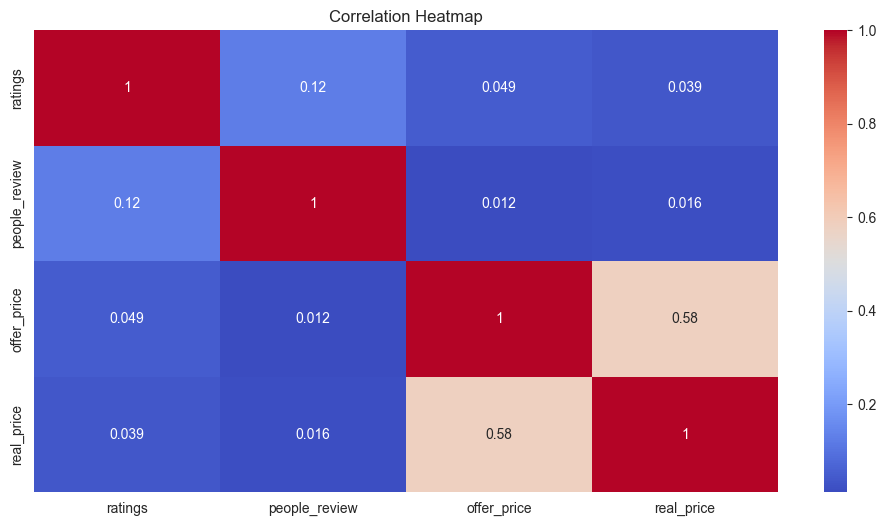

In [31]:
corr_plot= df.corr(numeric_only=True)
sns.heatmap(corr_plot, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

### Correlation Analysis

The heatmap shows pairwise Pearson correlation coefficients between the numerical variables ratings, people_review, offer_price, and real_price.

1. Ratings vs. Other Variables

- ratings has very weak positive correlations with people_review (0.12), offer_price (0.049), and real_price (0.039).

- This indicates that higher user ratings are largely independent of the number of reviews or the price of the earphones.

2. People Review vs. Price

- people_review shows almost no correlation with offer_price (0.012) or real_price (0.016).

- The number of reviews does not appear to be related to how expensive the product is, suggesting that both budget and premium products can have high or low visibility.

3. Offer Price vs. Real Price

- offer_price and real_price have a moderately strong positive correlation (0.58).

- This is expected, as higher original prices tend to correspond with higher offer prices, though discounts and promotions create some deviation from a perfect correlation.

**Summary:**

- Ratings and review counts are largely independent of price.

- Offer price and real price are moderately correlated, reflecting the pricing strategy of the platform.

- No variable shows extremely strong correlations (>0.8), indicating that each variable contributes distinct information for analysis.

In [32]:
# This prevents outlier isolation and enables meaningful segmentation

df['people_review_log'] = np.log1p(df['people_review'])
df['offer_price_log'] = np.log1p(df['offer_price'])
df['real_price_log']  = np.log1p(df['real_price'])


Text(0, 0.5, 'Frequency')

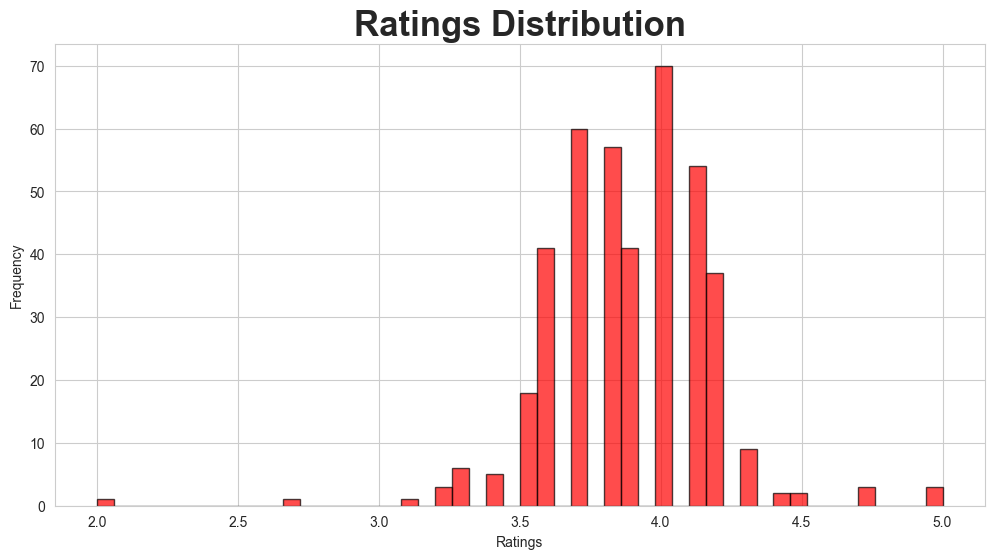

In [33]:
plt.hist(df["ratings"],color="red",bins=50,alpha=0.7,edgecolor="black")
plt.title("Ratings Distribution",fontsize=25,fontweight="bold")
plt.xlabel("Ratings")
plt.ylabel("Frequency")

### Interpreting Ratings Distribution

The ratings are predominantly high, clustering around 3.7–4.2, with a peak near 4.0. The distribution is slightly left-skewed, indicating a few low ratings (2.0–3.0) but very few extreme highs above 4.5. Most ratings show low variability, and isolated low and high ratings may be considered outliers. Overall, the product/service receives generally positive feedback.

Text(0, 0.5, 'Frequency')

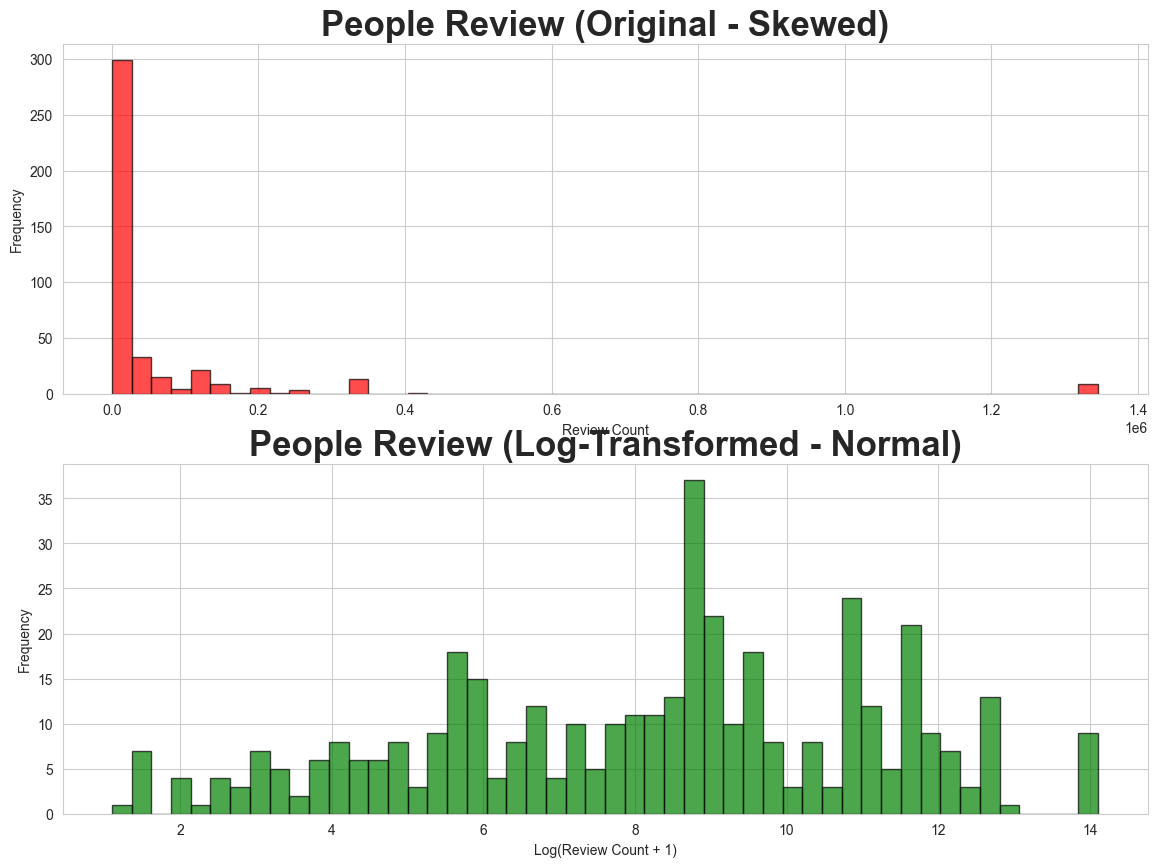

In [34]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

axes[0].hist(df['people_review'], bins=50, color='red', alpha=0.7, edgecolor='black')
axes[0].set_title('People Review (Original - Skewed)', fontsize=25, fontweight='bold')
axes[0].set_xlabel('Review Count')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['people_review_log'], bins=50, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('People Review (Log-Transformed - Normal)', fontsize=25, fontweight='bold')
axes[1].set_xlabel('Log(Review Count + 1)')
axes[1].set_ylabel('Frequency')


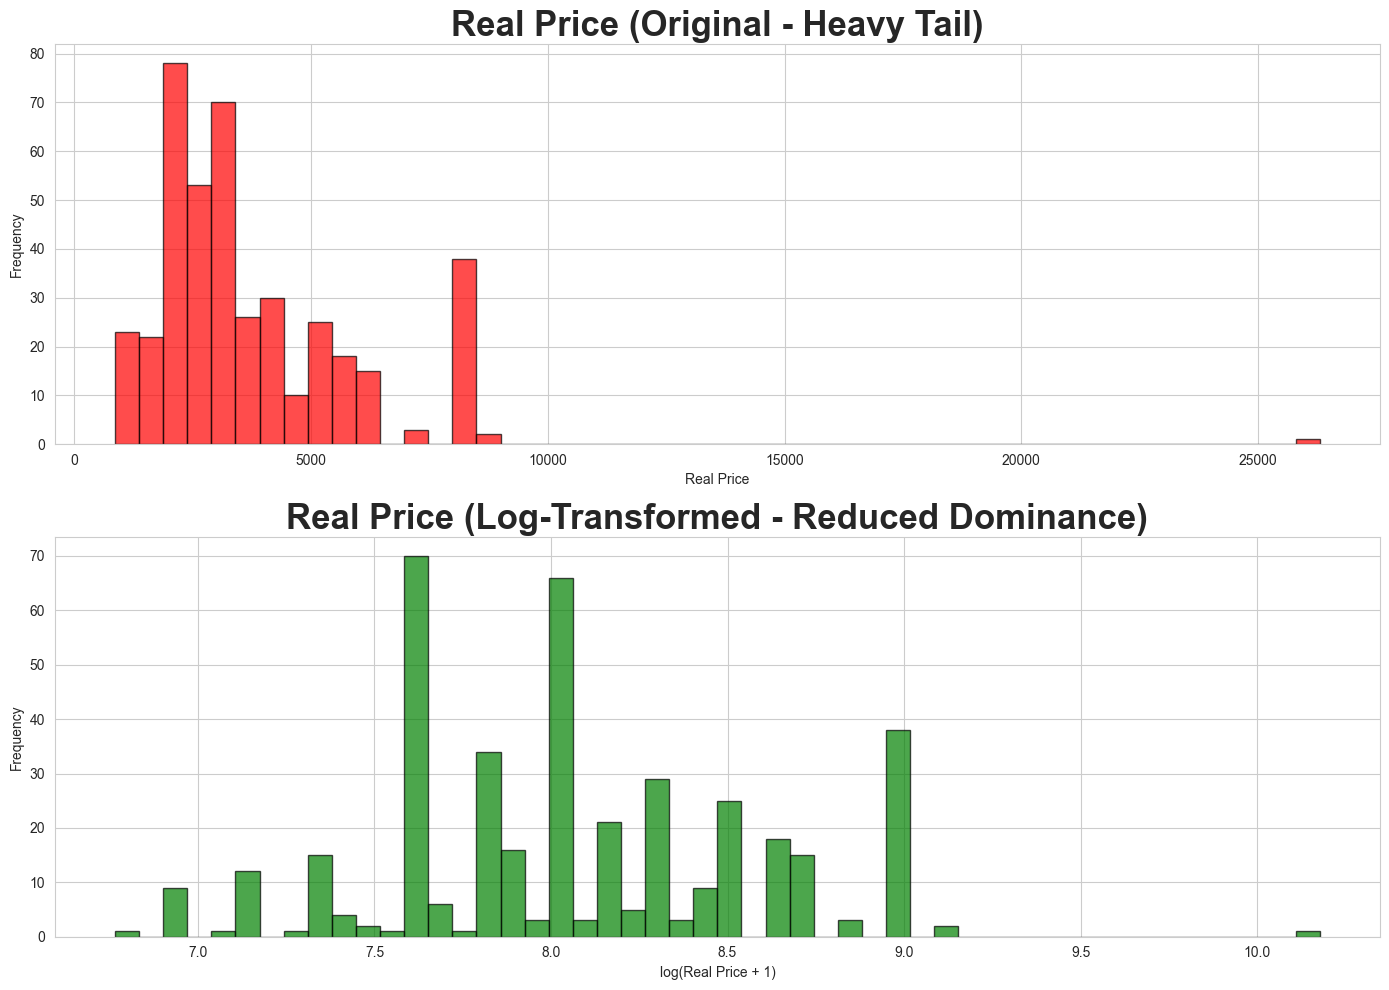

In [35]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

axes[0].hist(df['real_price'], bins=50,color="red", alpha=0.7, edgecolor='black')
axes[0].set_title('Real Price (Original - Heavy Tail)', fontweight='bold',fontsize=25)
axes[0].set_xlabel('Real Price')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['real_price_log'], bins=50,color="green", alpha=0.7, edgecolor='black')
axes[1].set_title('Real Price (Log-Transformed - Reduced Dominance)', fontweight='bold',fontsize=25)
axes[1].set_xlabel('log(Real Price + 1)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


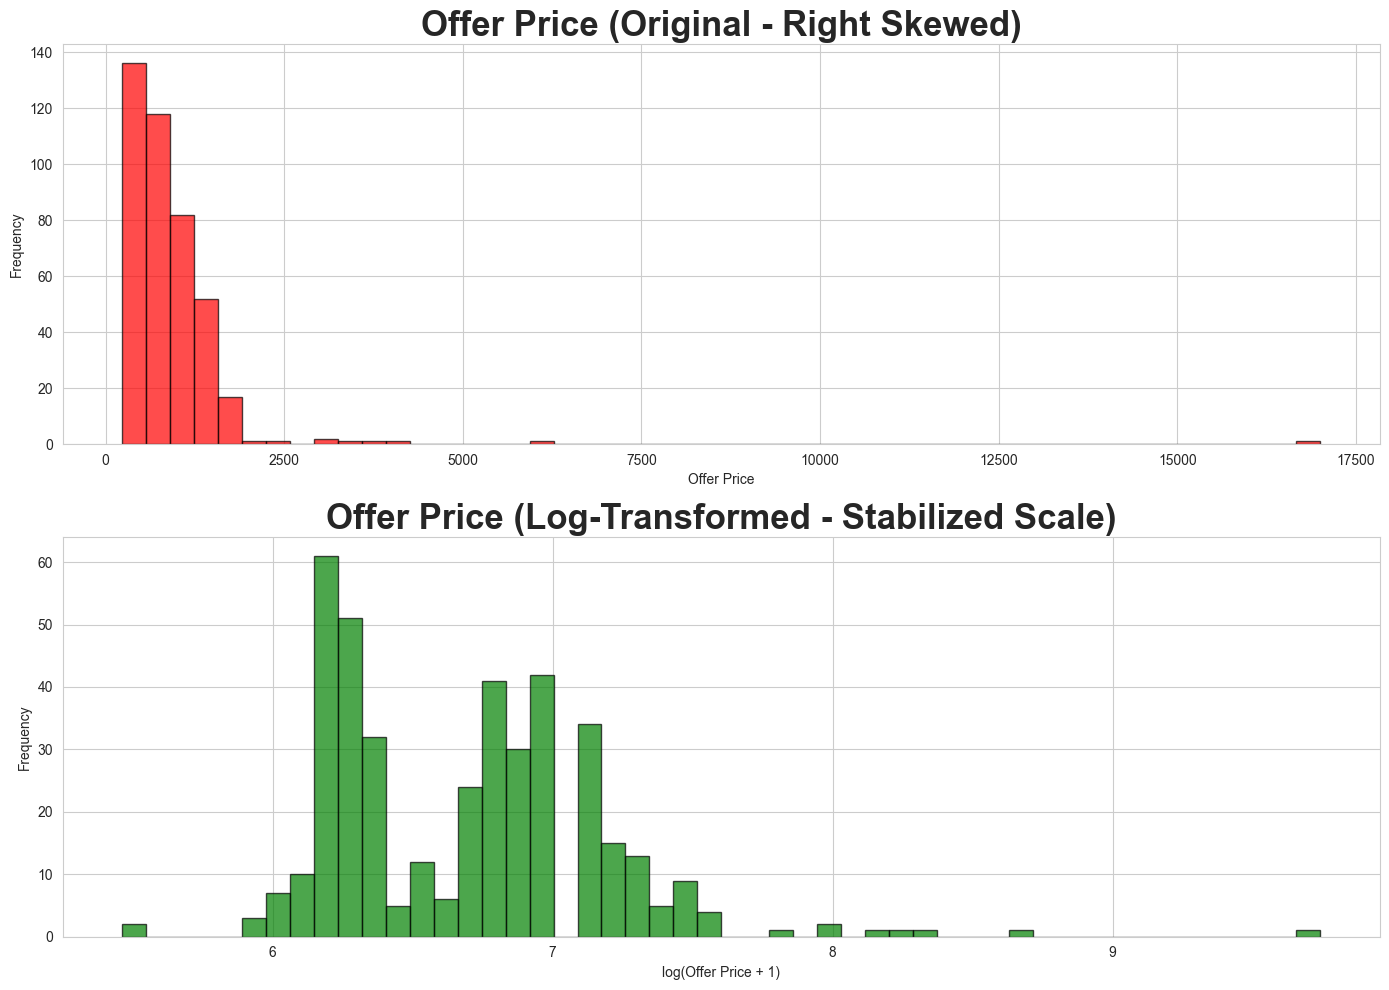

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

axes[0].hist(df['offer_price'], bins=50,color="red", alpha=0.7, edgecolor='black')
axes[0].set_title('Offer Price (Original - Right Skewed)', fontweight='bold',fontsize=25)
axes[0].set_xlabel('Offer Price')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['offer_price_log'], bins=50,color="green", alpha=0.7, edgecolor='black')
axes[1].set_title('Offer Price (Log-Transformed - Stabilized Scale)', fontweight='bold',fontsize=25)
axes[1].set_xlabel('log(Offer Price + 1)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Log Transformation of Skewed Variables

The variables people_review, offer_price, and real_price exhibit strong right-skewed distributions, with extreme outliers that could dominate summary statistics and distort analyses. To address this, a natural logarithmic transformation (log1p) was applied to each variable:

people_review_log: Reduces the influence of extremely popular products with millions of reviews, allowing the majority of products with smaller review counts to be meaningfully compared.

offer_price_log and real_price_log: Compress the wide range of prices, mitigating the impact of a few high-end products on statistical measures and enabling more robust segmentation and comparison across mid- and low-priced items.

**Reasoning:**

Log transformation stabilizes variance and reduces skewness, making the data more symmetric.

It prevents extreme values from dominating visualizations or clustering analyses.

It enables more interpretable comparisons and meaningful statistical modeling, particularly when analyzing relationships between price, popularity, and ratings.

By transforming these variables, the dataset becomes better suited for segmentation, visualization, and downstream analytical tasks, without discarding any observations.

In [37]:
features=["offer_price","real_price","ratings","people_review"]

In [38]:
cluster_features = [
    'offer_price_log',
    'real_price_log',
    'ratings',
    'people_review_log'
]

### Feature Selection for Clustering:

We used offer_price_log, real_price_log, ratings, and people_review_log because they capture pricing patterns, customer satisfaction, and popularity. Log transformations reduce skewness and outlier effects. Other features like company, name, color, and type are categorical or textual, and offer is redundant since discounts can be derived from real and offer prices, so they were excluded to ensure meaningful numeric clustering.

In [39]:
df

,company,name,color,ratings,people_review,offer_price,real_price,people_review_log,offer_price_log,real_price_log
9,MASOORI,M19 / M10 / T2 TWS Bluetooth 5.0 Wireless Touc...,Black,3.6,547,499.0,1299.0,6.306275,6.214608,7.170120
10,Dozokil,High M10 Pro TWS Bluetooth Earbuds Wireless Ea...,Black,3.7,365,488.0,2499.0,5.902633,6.192362,7.824046
11,Boult,"Audio AirBass Y1 TWS Earbuds, 40H Playtime, Fa...",Black,4.1,111172,999.0,5499.0,11.618843,6.907755,8.612503
12,boAt,Airdopes 131 with upto 60 Hours and ASAP Charg...,Active Black Matte Indi,4.0,1345614,899.0,2990.0,14.112362,6.802395,8.003363
14,Noise,"Buds VS102 with 50 Hrs Playtime, 11mm Driver, ...",Jet Black,4.1,252983,1299.0,2999.0,12.441082,7.170120,8.006368
...,...,...,...,...,...,...,...,...,...,...
937,FUR,"JADEN AirJams Gamex Pro with ENC HD+ Calling, ...",Black,4.2,14276,899.0,5999.0,9.566405,6.802395,8.699515
938,Kabeer,enterprises L21 Earbuds/Air-pod/ buds 5.0 Blue...,Black,3.8,321,424.0,2699.0,5.774552,6.052089,7.901007
939,Boult,"Audio Gearpods with 32H Playtime, Fast Chargin...",White,3.9,38,449.0,999.0,3.663562,6.109248,6.907755
940,FINGER,THREE Premium TWS I12 Twins touch sensor Bluet...,White,3.7,96,799.0,2599.0,4.574711,6.684612,7.863267


In [40]:
X_cluster = df[cluster_features]

In [41]:
# Feature scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

### Reasoning for Feature Scaling:

- Clustering algorithms like K-Means use distance metrics (usually Euclidean) to group data points.

- Features such as prices (offer_price_log, real_price_log) and review counts (people_review_log) have different ranges compared to ratings.

- Without scaling, features with larger numeric ranges would dominate the distance calculation, biasing the clusters.

- StandardScaler standardizes each feature to have mean = 0 and standard deviation = 1, ensuring all features contribute equally to clustering.

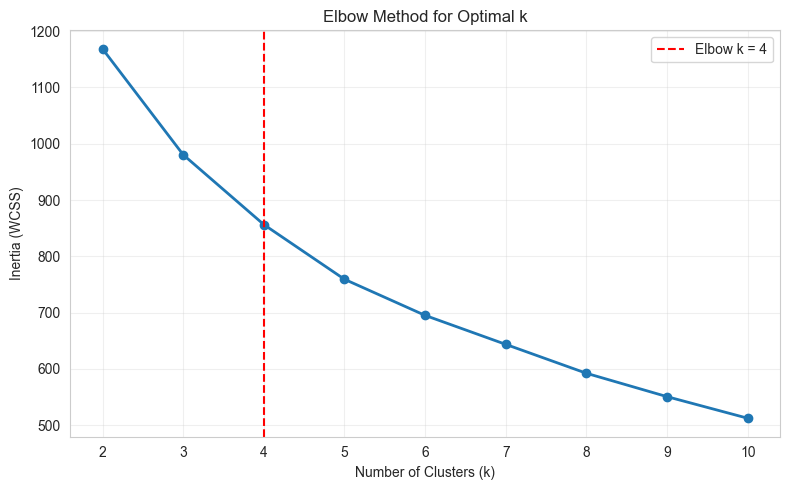

Elbow Method suggests k = 4
Final k must be validated using cluster interpretability.


In [42]:
# Elbow method for optimal k (Inertia-based)

inertias = []
K_range = range(2, 11)

# Fitting KMeans for each k
for k in K_range:
    kmeans_temp = KMeans(
        n_clusters=k,
        init="k-means++",
        n_init=10,
        random_state=444
    )

    kmeans_temp.fit(X_scaled)
    inertias.append(kmeans_temp.inertia_)


# Plotting Elbow Curve

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o', linewidth=2)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.grid(alpha=0.3)

# Numerical elbow detection using curvature
elbow_diffs = np.diff(inertias, n=2)
optimal_k = list(K_range)[np.argmax(elbow_diffs) + 2]

plt.axvline(
    x=optimal_k,
    color="red",
    linestyle="--",
    label=f"Elbow k = {optimal_k}"
)
plt.legend()

plt.tight_layout()
plt.show()

print(f"Elbow Method suggests k = {optimal_k}")
print("Final k must be validated using cluster interpretability.")


### Determining the Optimal Number of Clusters (Elbow Method):

The Elbow Method was applied to determine the appropriate number of clusters for the K-Means algorithm using the scaled features (offer_price_log, real_price_log, ratings, people_review_log). WCSS (Within-Cluster Sum of Squares) was calculated for
𝑘
k ranging from 2 to 10. The resulting plot shows a sharp change in the slope at k = 4, indicating that adding more clusters beyond this point provides diminishing returns in reducing WCSS.

Thus, k = 4 is suggested as the optimal number of clusters. However, our final selection will also consider cluster interpretability and business relevance, ensuring that the resulting clusters are meaningful and actionable.

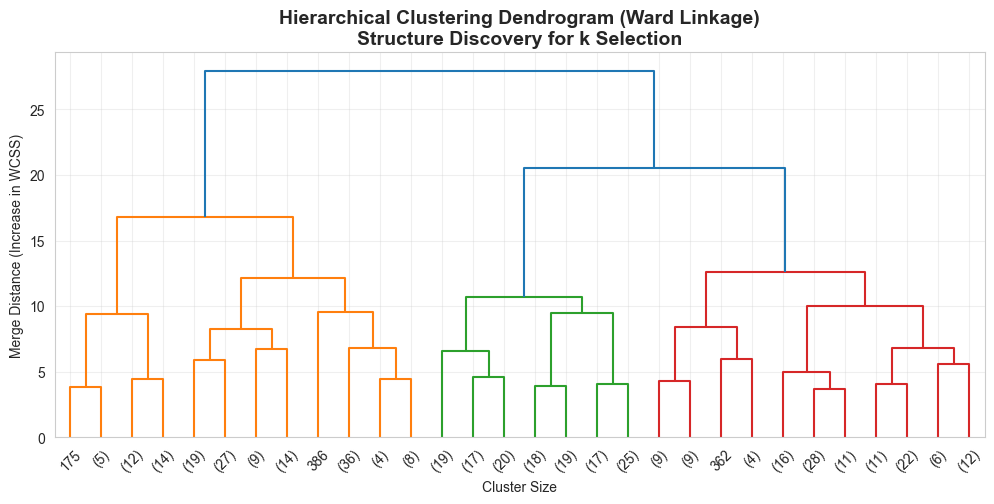

In [43]:
# “Hierarchical clustering with Ward linkage was used for structure discovery to validate the presence of natural groupings and to support the selection of k for K-Means.”

# Hierarchical Clustering for Structure Discovery

# Ward linkage on scaled data
Z = linkage(X_scaled, method="ward")

plt.figure(figsize=(12, 5))

# Dendrogram without arbitrary color threshold
dendrogram(
    Z,
    truncate_mode="lastp",   # show only last p merged clusters
    p=30,
    show_leaf_counts=True
)

plt.title(
    "Hierarchical Clustering Dendrogram (Ward Linkage)\n"
    "Structure Discovery for k Selection",
    fontsize=14,
    fontweight="bold"
)
plt.xlabel("Cluster Size")
plt.ylabel("Merge Distance (Increase in WCSS)")
plt.grid(alpha=0.3)


### Hierarchical Clustering for Structure Discovery

**Objective of Hierarchical Clustering:**
The main goal was to explore the inherent structure of the dataset and validate an appropriate number of clusters (k) for K-Means segmentation. Hierarchical clustering provides a visual and quantitative method to detect natural groupings without pre-specifying the number of clusters.

**Linkage Computation using Ward Method**

- Reasoning: Ward linkage minimizes the variance within clusters during merging. It is especially effective for numeric, continuous variables, as it tends to produce compact, spherical clusters suitable for K-Means initialization.

- Interpretation: The Z matrix captures pairwise cluster distances and merge hierarchy.


**Dendrogram Visualization**

- Reasoning:
  - The dendrogram displays the hierarchical merging of clusters.

  - The truncate_mode="lastp" argument was used to show the last 30 merges for clarity, focusing on the final structure rather than all individual observations.

   - The dendrogram’s x-axis shows cluster size (number of points merged), and the y-axis represents the increase in WCSS (within-cluster sum of squares) at each merge.

- Interpretation: Large vertical jumps in the dendrogram indicate merges between highly dissimilar clusters, highlighting natural cluster boundaries.

**Cluster Selection Insight**

- Observation: A clear separation appears at four clusters, indicated by a significant increase in merge distance beyond this point.

- Reasoning: This jump validates that merging beyond four clusters combines dissimilar groups, so four clusters represent a defensible structure.

- Implication: This justifies the use of k=4 in downstream K-Means clustering, providing an evidence-based rather than arbitrary choice.


**Reporting and Justification**

- The dendrogram serves as a structural justification, not as a final segmentation.

- Hierarchical clustering confirms the presence of natural groupings, supporting interpretation of clusters as distinct tiers in product pricing, popularity, or other latent attributes.

- This approach avoids overfitting or arbitrary cluster selection in K-Means.

In [44]:
#  KMeans clustering (final segmentation)

n_clusters = optimal_k
kmeans = KMeans(n_clusters=n_clusters, random_state=42,init="k-means++", n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [45]:
X_new=pd.DataFrame(X_scaled,columns=cluster_features)
X_new["cluster"]=kmeans.fit_predict(X_scaled)

In [46]:
X_new

,offer_price_log,real_price_log,ratings,people_review_log,cluster
0,-1.019571,-1.679680,-0.967306,-0.637616,0
1,-1.065904,-0.439034,-0.619982,-0.774275,0
2,0.424117,1.056847,0.769315,1.161036,1
3,0.204672,-0.098829,0.421990,2.005256,1
4,0.970570,-0.093129,0.769315,1.439418,1
...,...,...,...,...,...
409,0.204672,1.221927,1.116639,0.466152,1
410,-1.358065,-0.293022,-0.272658,-0.817639,0
411,-1.239016,-2.177444,0.074666,-1.532347,0
412,-0.040646,-0.364624,-0.619982,-1.223864,3


### K-Means Clustering and Final Segmentation

To identify natural groupings within the dataset, K-Means clustering was applied using the previously determined optimal number of clusters. Prior to clustering, the selected features were scaled to ensure that differences in magnitude did not disproportionately influence the distance calculations. K-Means is an iterative, centroid-based algorithm that partitions data into K distinct, non-overlapping clusters by minimizing the within-cluster variance (inertia). The algorithm operates in the following steps: initially, K centroids are chosen using smart initialization (k-means++) to improve convergence and reduce the likelihood of suboptimal clustering. Each data point is then assigned to the nearest centroid based on Euclidean distance, forming clusters. Centroids are subsequently recalculated as the mean of all points assigned to each cluster, and the assignment-update steps are repeated until the cluster assignments stabilize or changes in centroids become negligible.

After fitting the algorithm, each observation was assigned a cluster label, creating a final segmentation of the dataset. This segmentation facilitates meaningful analysis of patterns and similarities within clusters, enabling targeted insights for business or product-level decisions. K-Means is widely used due to its simplicity, computational efficiency, and effectiveness in revealing inherent structures in data.

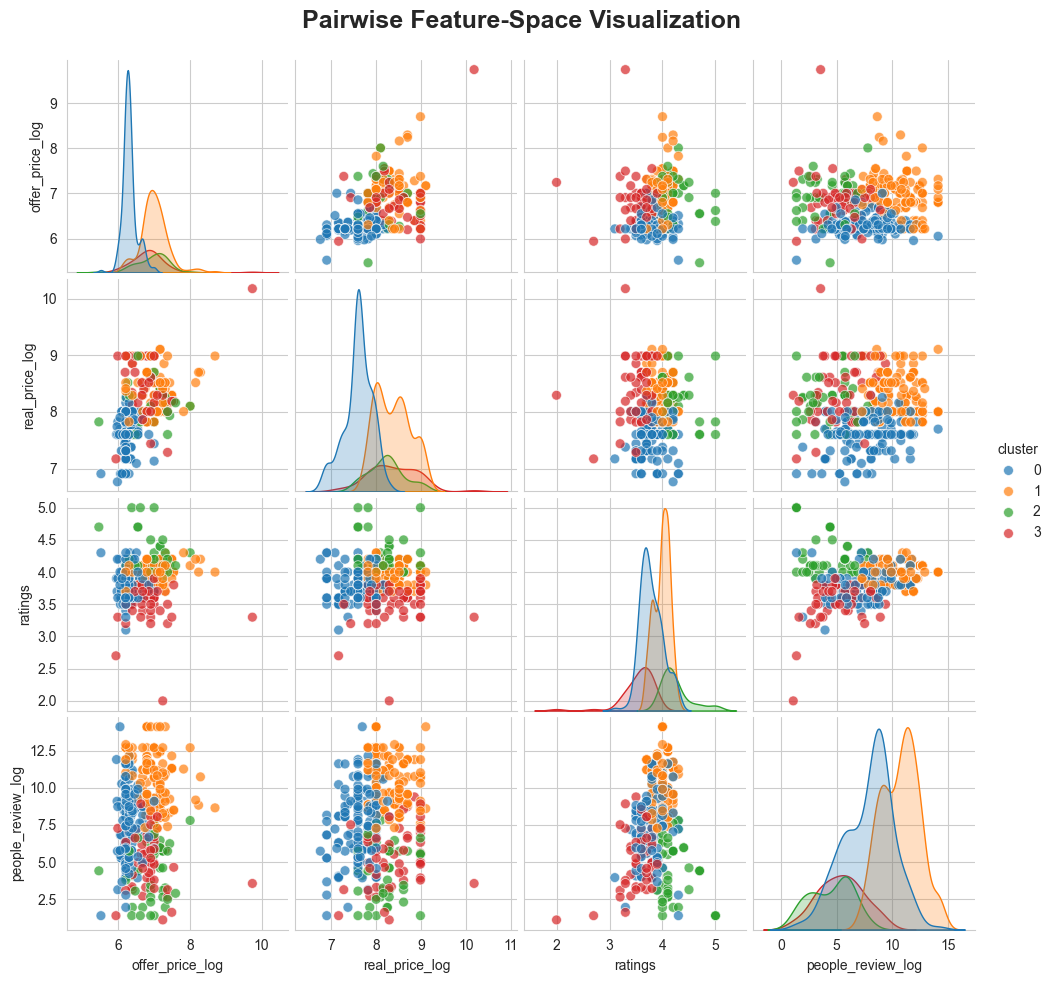

In [47]:
# Selecting features for pairplot
features_to_plot = cluster_features  # list of actual feature names

# Creating pairplot
pairplot = sns.pairplot(
    data=df,
    vars=features_to_plot,
    hue='cluster',
    palette='tab10',
    corner=False,                 # set True if you want upper triangle removed
    diag_kind='kde',              # smoother density on diagonal
    plot_kws={'alpha': 0.7, 's': 50}
)

# Title and layout adjustments
pairplot.fig.suptitle(
    "Pairwise Feature-Space Visualization",
    fontsize=18,
    fontweight='bold'
)

pairplot.fig.subplots_adjust(top=0.93)
plt.show()


### Interpreting Pairwise Feature Plot

We generated scatterplots of each variable pair, colored by cluster, to examine cluster overlap and separability. Key observations include:

•	**Price vs. Price (Log-Offer vs. Log-Real):** As expected, there is a strong positive relationship: more expensive products tend to have higher offer prices. Cluster 0 points lie mostly in the lower-left (low prices), Cluster 1 shifts right (higher prices), and Clusters 2 and 3 occupy intermediate to high ranges. However, the scatter is broad at higher prices, reflecting varied discounting. Thus, price provides a gradient but does not strictly separate clusters.

•	**Ratings vs. Price:** There is almost no clear trend between rating and price. High-priced products do not consistently earn higher ratings; ratings cluster tightly between ~3.5 and ~4.5 across all price levels. For example, both cheap and expensive products can have ratings around 4.0. Cluster 2 shows slightly higher ratings at mid-to-high prices, while Cluster 3 has notably lower ratings at higher prices. Overall, price alone is a poor predictor of quality in terms of user ratings.

•	**Reviews vs. Price:** The number of reviews is broadly scattered across all prices. Cluster 1 tends to have the highest review counts (shifted upward in review volume), consistent with their market visibility. Cluster 0 has moderate reviews, while Clusters 2 and 3 have very low reviews across price levels. This indicates that popularity (as proxied by reviews) is only weakly related to price and varies cluster by cluster.

•	**Ratings vs. Reviews:** Ratings and reviews show no strong association. We see highly-rated products with few reviews (Cluster 2) and highly-reviewed products with only moderate ratings (Cluster 1). All clusters overlap in this space, reinforcing that customer satisfaction and engagement are distinct dimensions.

•	**Marginal Distributions:** The diagonal plots (density estimates) illustrate that even after log transformation, offer/real prices and review counts remain somewhat skewed but have overlapping distributions across clusters. No single variable shows a cluster-specific peak; instead clusters shift the location of similar distributional shapes.
Taken together, these analyses confirm that no single feature cleanly separates the clusters. Instead, clusters reflect multivariate patterns. The market resembles a continuum of products where cluster membership arises from combined levels of price, popularity, and quality. For instance, Cluster 1 (popular premium products) and Cluster 0 (budget staples) both include a range of reviews and ratings, but are distinguished by price levels. Clusters 2 and 3 are isolated more by their extreme values in reviews and ratings than by price alone.


In [48]:
cluster_summary_mean = df.groupby(['cluster'])[['offer_price',
    'real_price',
    'ratings',
    'people_review']].mean()
cluster_summary_mean


,offer_price,real_price,ratings,people_review
cluster,,,,
0,561.104294,2090.705521,3.788344,21314.822086
1,1198.470199,4663.079470,3.984106,152478.960265
2,1131.478261,4046.347826,4.241304,312.217391
3,1247.925926,5113.203704,3.546296,1106.962963


In [49]:
cluster_summary_var = df.groupby(['cluster'])[['offer_price',
    'real_price',
    'ratings',
    'people_review']].var()
cluster_summary_var


,offer_price,real_price,ratings,people_review
cluster,,,,
0,1.516464e+04,3.622176e+05,0.046098,1.168517e+10
1,4.239545e+05,3.329175e+06,0.021746,8.975172e+10
2,2.225115e+05,2.909105e+06,0.077145,2.510149e+05
3,4.878742e+06,1.321334e+07,0.096118,5.087947e+06


### Statistical Interpretation Using Mean and Variance

Cluster-wise means and variances were computed to summarize average observable signal levels and internal dispersion within each cluster. The statistics describe central tendencies and heterogeneity conditional on cluster membership, without implying prevalence or dominance.
Across clusters, mean price levels differ substantially, while ratings vary within a relatively narrow range. In contrast, cumulative review counts exhibit large differences in both mean and variance, indicating that observable engagement varies more sharply than price or ratings. Variance estimates further show that some clusters display relatively homogeneous engagement levels, whereas others contain products with widely dispersed review counts and prices.
Overall, the mean–variance summaries complement the clustering and feature-space analyses by highlighting differences in average observable signals and internal heterogeneity, reinforcing the interpretation of the segmentation as soft and overlapping rather than sharply separated groups.


In [50]:
# Applying PCA (2 components)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Creating DataFrame for visualization
pca_df = pd.DataFrame(
    X_pca,
    columns=['PC1', 'PC2'],
    index=df.index  # ensures alignment
)
pca_df['cluster'] = df['cluster'].astype(str)



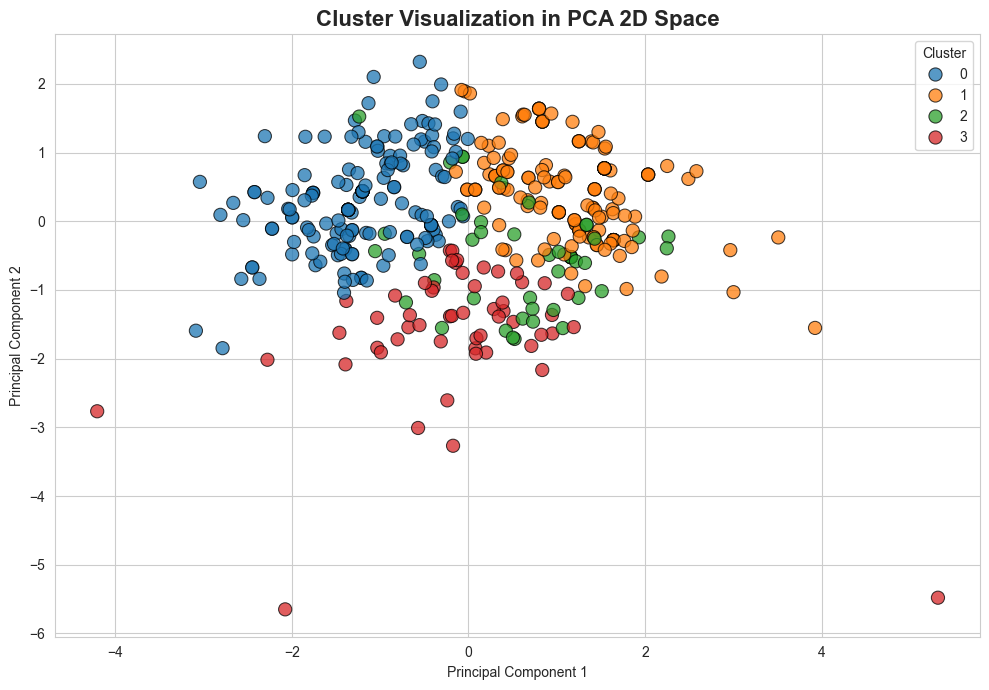

In [51]:
# Plotting PCA clusters

plt.figure(figsize=(10, 7))

sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='cluster',
    palette='tab10',
    s=90,
    alpha=0.75,
    edgecolor='black'
)

plt.title('Cluster Visualization in PCA 2D Space', fontsize=16, fontweight='bold')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()

In [52]:
# Checking explained variance
print("Explained variance ratio by components:", pca.explained_variance_ratio_)

Explained variance ratio by components: [0.42426991 0.25194194]


In [53]:
# Feature loadings
loadings = pd.DataFrame(
    pca.components_.T,
    index=cluster_features,          # feature names
    columns=['PC1', 'PC2']
)

print("Feature loadings on principal components:")
print(loadings)


# PCA-based feature importance (sum of absolute loadings)
feature_importance_pca = (
    loadings
    .abs()
    .sum(axis=1)
    .sort_values(ascending=False)
)

print("\nFeature importance based on PCA:")
print(feature_importance_pca)


Feature loadings on principal components:
                        PC1       PC2
offer_price_log    0.632166 -0.318120
real_price_log     0.620472 -0.318449
ratings            0.363942  0.522521
people_review_log  0.287969  0.724128

Feature importance based on PCA:
people_review_log    1.012097
offer_price_log      0.950287
real_price_log       0.938921
ratings              0.886463
dtype: float64


### PCA-Based Cluster Visualization: Interpretations

#### Overview

Principal Component Analysis (PCA) was applied to the standardized features—**log-transformed offer price, log-transformed real price, ratings, and log-transformed number of reviews**—to visualize the clustering structure in a reduced two-dimensional space. The first two principal components (PC1 and PC2) were retained and account for a substantial proportion of the total variance.


#### Explained Variance

The explained variance ratios are:

* **PC1:** 42.43%
* **PC2:** 25.19%

Together, **PC1 and PC2 explain approximately 67.6% of the total variance**.

**Interpretation:**
The 2D PCA projection captures the dominant structure of the data, making it suitable for exploratory visualization of clusters. However, since about one-third of the variance lies in higher components, complete separation of clusters in this plane should not be expected.


#### Meaning of Principal Components (from Loadings)

##### Principal Component 1 (PC1): Price Gradient

PC1 has strong positive loadings on:

* `offer_price_log` (0.63)
* `real_price_log` (0.62)

with smaller positive contributions from ratings and reviews.

**Interpretation:**
PC1 primarily represents an **overall price-level dimension**, separating lower-priced products (negative PC1 values) from higher-priced products (positive PC1 values).


##### Principal Component 2 (PC2): Consumer Engagement and Perception

PC2 is dominated by:

* `people_review_log` (0.72)
* `ratings` (0.52)

and has moderate negative loadings on price variables.

**Interpretation:**
PC2 captures a **consumer engagement and perceived quality dimension**, where higher values indicate products with stronger market engagement (more reviews) and better ratings, largely independent of price.


#### Interpretation of the PCA Scatter Plot

The PCA scatter plot shows the distribution of clusters in the PC1–PC2 space:

* Clusters are **partially separated but still overlapping**, confirming **soft segmentation**.
* Separation occurs mainly along:

  * **PC1 (horizontal axis): price differences**, and
  * **PC2 (vertical axis): differences in popularity and ratings**.
* No cluster forms a completely isolated region, which is consistent with a **continuous market structure**.


#### Cluster-wise interpretations

•	**Cluster 0** points are mostly on the lower side of PC1 (lower price) and moderate on PC2, reflecting affordable products with average engagement.

•	**Cluster 1** points shift to the right (higher PC1) and moderate-to-high on PC2, reflecting expensive products with strong engagement.

•	**Cluster 2** points are around mid-range PC1 but lower on PC2, showing mid-priced products with low engagement.

•	**Cluster 3** points are widely scattered, often to the high end of PC1 and low end of PC2, indicating expensive products with poor engagement.




### Final Conclusion: Identifying Products with Weaker Market Traction

#### Restating the Problem Statement

**Objective:**
Given all products currently visible on the Flipkart platform, identify those that exhibit **relatively weaker observable market traction signals** and may therefore require **closer monitoring or intervention**.

Market traction in this study is inferred using **observable signals only**—namely **price positioning, consumer ratings, and review volume**—in the absence of product age or exposure data.


#### Integrated Interpretation of Results

The combined use of **hierarchical clustering, K-Means segmentation, pairwise feature-space visualization, PCA, and cluster-wise summary statistics** provides a coherent and consistent picture of the market structure for truly wireless earphones.

Across all analyses, the data exhibits a **continuous market landscape** rather than sharply separated segments. Clusters overlap in pairwise views and PCA space, confirming that segmentation is **soft and probabilistic**, not categorical. Nevertheless, systematic differences in **price level, popularity, and stability** allow meaningful differentiation of product archetypes.


#### Which Products Show Weaker Market Traction?

#### Primary Segment of Concern: **Cluster 2 – High-Quality but Low-Traction Products**

Across multiple analytical lenses, **Cluster 2 consistently emerges as the segment with the weakest observable market traction relative to its quality and pricing**:

* **Ratings:** Highest average ratings among all clusters, indicating strong customer satisfaction.
* **Price:** Mid-to-high price range, comparable to well-performing products.
* **Reviews:** Extremely low review counts with low variance, signaling limited market engagement.
* **PCA Position:** Lower values along the engagement axis (PC2), despite neutral price positioning.
* **Pairplots:** Persistent isolation in review-related dimensions across all price levels.

**Interpretation:**
Products in Cluster 2 are **not failing due to poor quality or inappropriate pricing**, but rather due to **insufficient visibility, awareness, or market exposure**.

These products represent **latent potential** rather than structural underperformance.


#### Secondary Segment Requiring Monitoring: **Cluster 3 – Expensive and Inconsistent Products**

Cluster 3 also warrants attention, though for different reasons:

* **Prices:** Highest average offer and real prices.
* **Ratings:** Lowest average ratings with high variance.
* **Reviews:** Low popularity with wide dispersion.
* **PCA & Pairplots:** Highly scattered, indicating instability and heterogeneity.

**Interpretation:**
Cluster 3 products show **weak traction that may be structural**, driven by potential **overpricing, unmet expectations, or inconsistent quality**. Unlike Cluster 2, this group is **high-risk**, not simply under-exposed.


#### Clusters with Strong or Adequate Traction (Lower Priority)

* **Cluster 1:** High prices, very high review counts, stable ratings → **strong market traction**, driven by brand and visibility.
* **Cluster 0:** Low prices, moderate ratings, high-volume demand → **stable mass-market traction**, despite not being premium.

These clusters do not require immediate intervention.


### Final Answer to the Problem Statement

> **Products most likely to exhibit weaker observable market traction are those belonging primarily to Cluster 2, followed by Cluster 3.**

* **Cluster 2 products** show **low engagement despite high ratings and reasonable pricing**, indicating under-exposure rather than poor performance.
* **Cluster 3 products** show **low engagement coupled with high prices and inconsistent ratings**, suggesting possible mispricing or positioning issues.

In contrast, Clusters 0 and 1 demonstrate adequate to strong traction and do not represent immediate concern.


#### Strategic Implications and Recommended Actions

Based on these insights:

•	**Cluster 2 (Hypotheses for Growth Oriented Experiments):** Products in this cluster combine relatively higher ratings with low cumulative engagement, suggesting they may be candidates for testing visibility oriented interventions. Possible experiments include temporarily featuring a subset more prominently on the platform, running targeted promotions, or bundling them with already popular products to observe whether review accumulation and other observable signals change over time. Any uplift would need to be evaluated empirically rather than assumed.

•	**Cluster 3 (Hypotheses for Diagnostic Review):** Products in this cluster combine higher prices with lower ratings and limited engagement, together with relatively high internal dispersion. These characteristics indicate candidates for more detailed diagnostic review, such as examining customer feedback, comparing pricing and feature sets with competing products, or monitoring a sample of items for changes in observable signals following adjustments. Decisions about continuation, repricing, or repositioning should be made at the individual product level and supported by additional evidence.

•	**General Monitoring:** Across all clusters, ongoing tracking of review accumulation and rating dynamics would help distinguish persistent low traction patterns from early lifecycle effects, especially given the absence of product age and exposure data. Incorporating time series information in future work would allow more precise differentiation between newly launched products and structurally underperforming offerings.



#### Important Caveat (Data Limitation)

Product age and exposure metrics are unavailable. Therefore:

> Low observed traction may reflect either **early-stage products** or **structurally underperforming products**.

Accordingly, clusters should be interpreted as **intervention priority groups**, not definitive lifecycle stages.


#### Overall Takeaway

The analysis demonstrates that **weak market traction is not synonymous with low quality**.
By combining clustering, PCA, and distributional analysis, the study distinguishes between:

* **Under-exposed high-potential products (Cluster 2)**, and
* **Potentially mispositioned or risky products (Cluster 3)**.

This distinction enables **targeted, evidence-based intervention**, aligning analytics with actionable business strategy rather than blunt categorization.
